# Data Analysis of image data

## 1. Import libraries

In [35]:
import os
import urllib.request
import zipfile
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.color import rgb2hsv

## 2. Loading and Preprocesing Data

### 2.1 Defining Path

In [36]:
download_url = "https://www.kaggle.com/api/v1/datasets/download/borhanitrash/animal-image-classification-dataset"
download_dir = "../datasets"
zip_filename = "animals.zip"

# Create the directory if it doesn't exist yet
os.makedirs(download_dir, exist_ok=True)

### 2.2 Download the Dataset from Kaggle

In [37]:
local_zip_path = os.path.join(download_dir, zip_filename)

urllib.request.urlretrieve(download_url, local_zip_path)
print(f"Downloaded to {local_zip_path}")

Downloaded to ../datasets/animals.zip


### 2.3 Extract the zip-file

In [38]:
with zipfile.ZipFile(local_zip_path, 'r') as zip_ref:
        zip_ref.extractall(download_dir)

### 2.4 Loading Images into numpy Arrays

In [39]:
# Defining class directories
cats_dir = os.path.join(download_dir,"Animals", "cats")
dogs_dir = os.path.join(download_dir,"Animals", "dogs")
snakes_dir = os.path.join(download_dir,"Animals", "snakes")

In [40]:
def load_images_from_directory(directory):
    images = []
    for file in os.listdir(directory):
        img_path = os.path.join(directory, file)
        img = Image.open(img_path).convert("RGB") 
        img_array = np.array(img)
        images.append(img_array)
    return np.array(images)

In [41]:
cats_data = load_images_from_directory(cats_dir)
print(f"Loaded {len(cats_data)} cat images.")

dogs_data = load_images_from_directory(dogs_dir)
print(f"Loaded {len(dogs_data)} dog images.")

snakes_data = load_images_from_directory(snakes_dir)
print(f"Loaded {len(snakes_data)} snake images.")

Loaded 1000 cat images.
Loaded 1000 dog images.
Loaded 1000 snake images.


In [42]:
print("All images loaded successfully.")
print(f"Shape of cats array: {cats_data.shape}")
print(f"Shape of dogs array: {dogs_data.shape}")
print(f"Shape of snakes array: {snakes_data.shape}")


All images loaded successfully.
Shape of cats array: (1000, 256, 256, 3)
Shape of dogs array: (1000, 256, 256, 3)
Shape of snakes array: (1000, 256, 256, 3)


## 3. Showing Images from each Class

In [43]:
def show_random_images(images, class_name):
    sampled_images = random.sample(list(images), 16)  
    plt.figure(figsize=(10, 10))
    for i, img in enumerate(sampled_images):
        plt.subplot(4, 4, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(f"Images of {class_name}", fontsize=16)
    plt.tight_layout()
    plt.show()

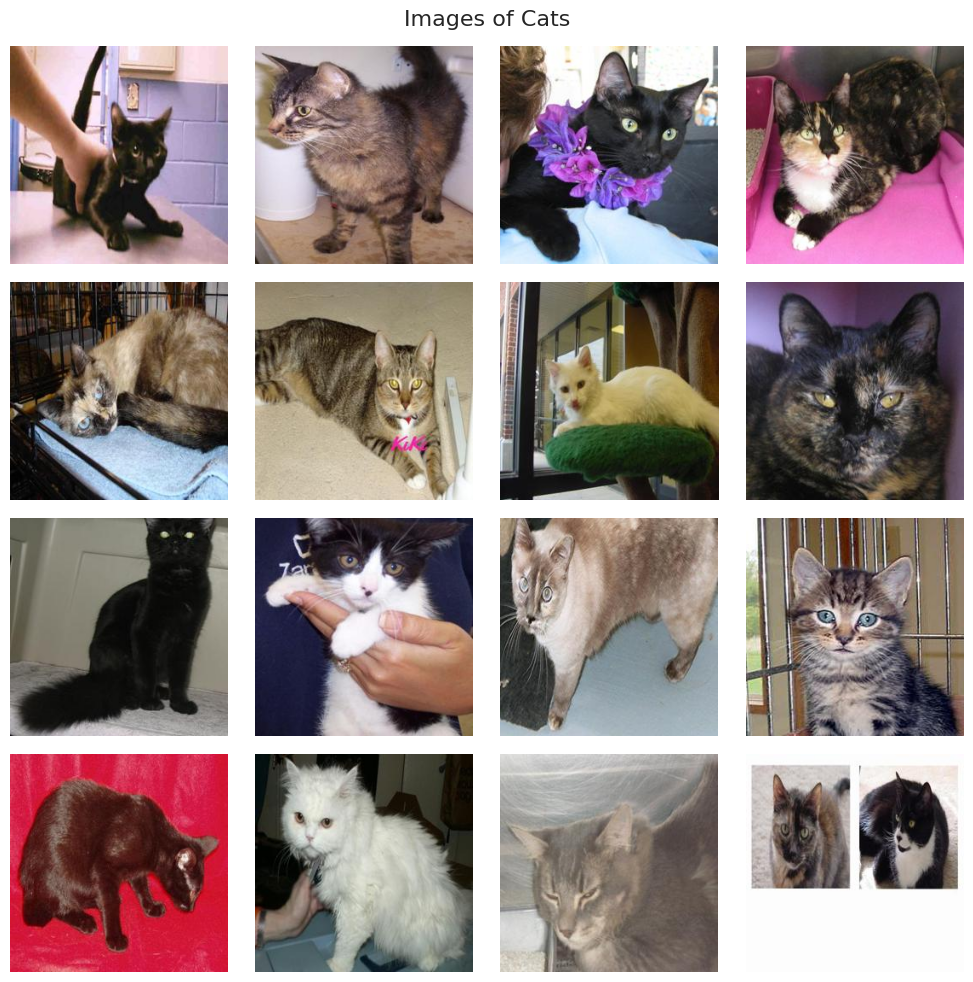

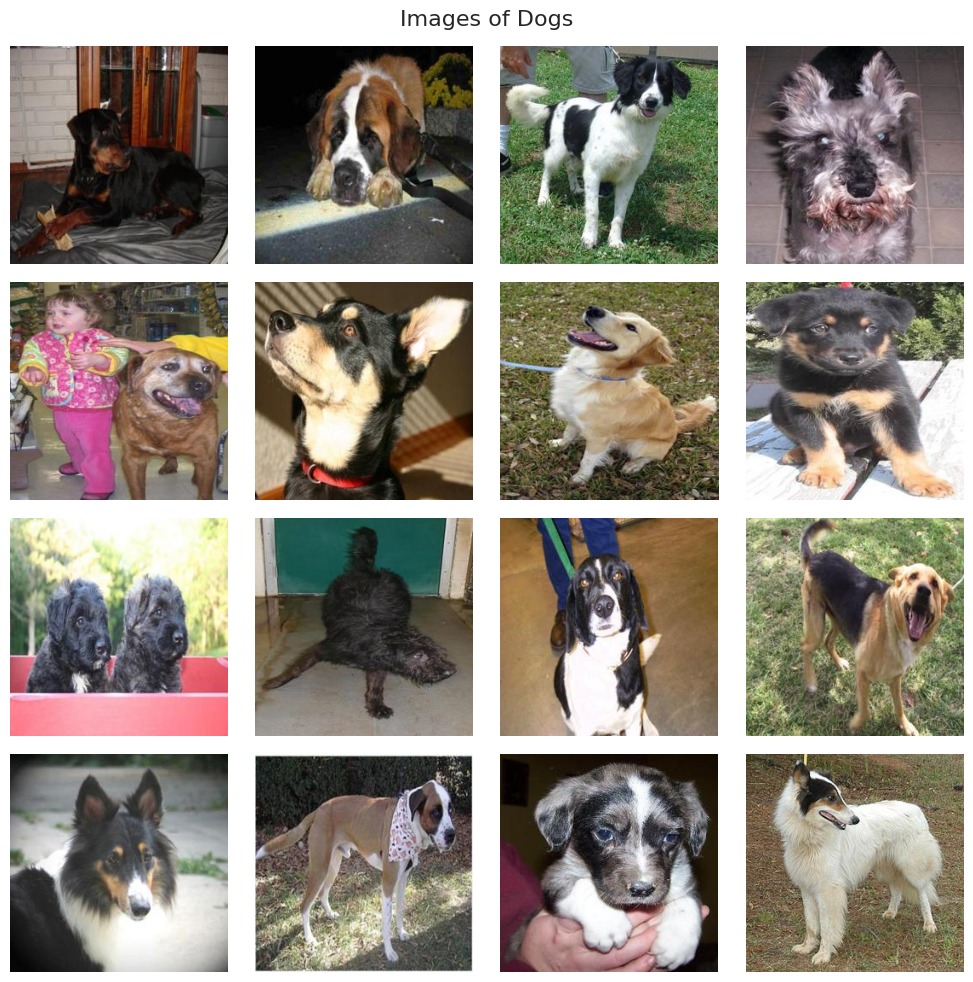

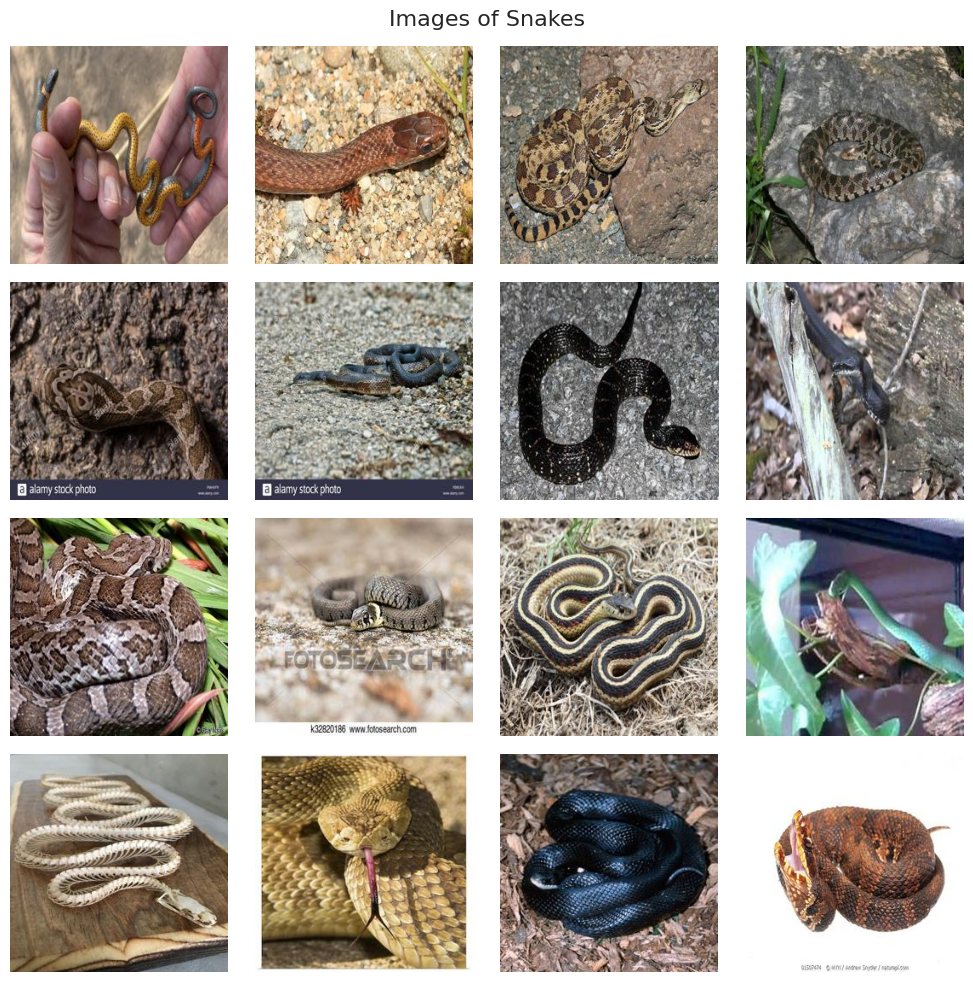

In [44]:
show_random_images(cats_data, "Cats")
show_random_images(dogs_data, "Dogs")
show_random_images(snakes_data, "Snakes")

## 4. RGB Histograms

In [45]:
def calculate_hist(image_data, bins=32, range_val=(0, 255)):
    
    r_channel = image_data[:, :, :, 0].flatten()
    g_channel = image_data[:, :, :, 1].flatten()
    b_channel = image_data[:, :, :, 2].flatten()

    r_hist, r_bins = np.histogram(r_channel, bins=bins, range=range_val)
    g_hist, g_bins = np.histogram(g_channel, bins=bins, range=range_val)
    b_hist, b_bins = np.histogram(b_channel, bins=bins, range=range_val)

    r_pdf = r_hist / np.sum(r_hist)
    g_pdf = g_hist / np.sum(g_hist)
    b_pdf = b_hist / np.sum(b_hist)

    return (r_pdf, r_bins), (g_pdf, g_bins), (b_pdf, b_bins)

In [ ]:
def plot_hist(r_pdf, r_bins, g_pdf, g_bins, b_pdf, b_bins):

    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

    axes[0].bar(r_bins[:-1], r_pdf, width=np.diff(r_bins), color='red', edgecolor='black')
    axes[0].set_title("Red Channel Histogram")
    axes[0].set_xlabel("Pixel Values")
    axes[0].set_ylabel("Relative Frequency")
    axes[0].set_ylim([0, 0.06])

    axes[1].bar(g_bins[:-1], g_pdf, width=np.diff(g_bins), color='green', edgecolor='black')
    axes[1].set_title("Green Channel Histogram")
    axes[1].set_xlabel("Pixel Values")

    axes[2].bar(b_bins[:-1], b_pdf, width=np.diff(b_bins), color='blue', edgecolor='black')
    axes[2].set_title("Blue Channel Histogram")
    axes[2].set_xlabel("Pixel Values")

    plt.tight_layout()
    plt.suptitle("RGB Channel Histograms", fontsize=16, y=1.03)
    plt.show()

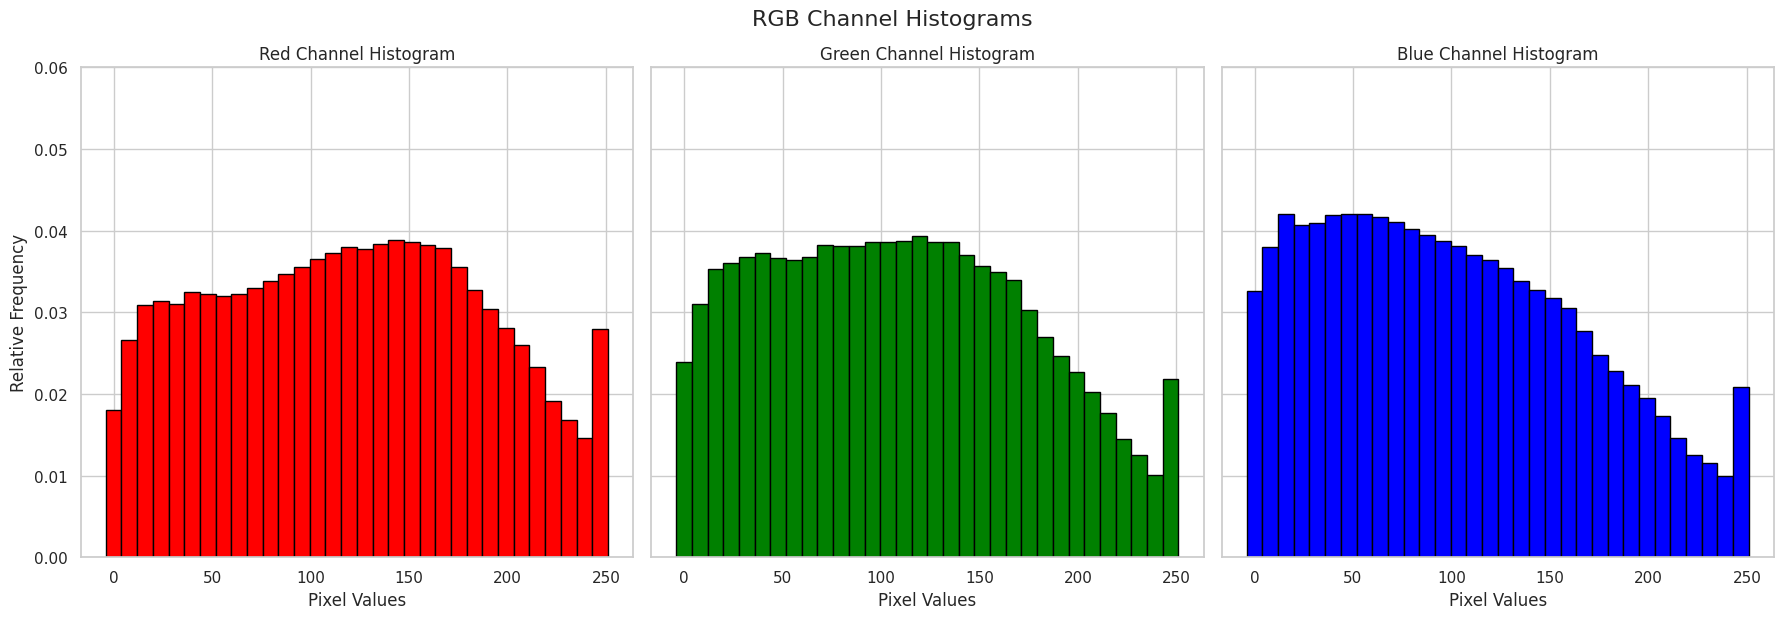

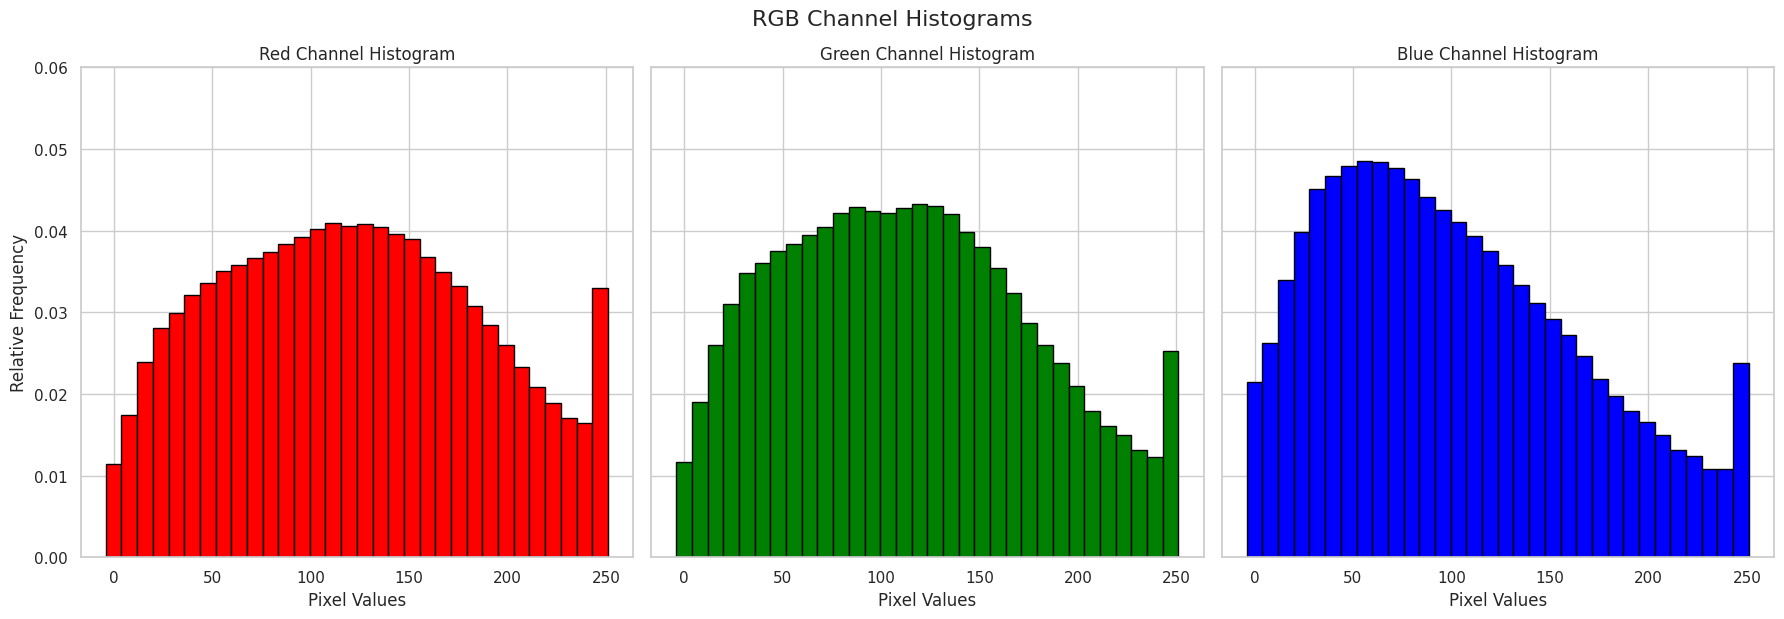

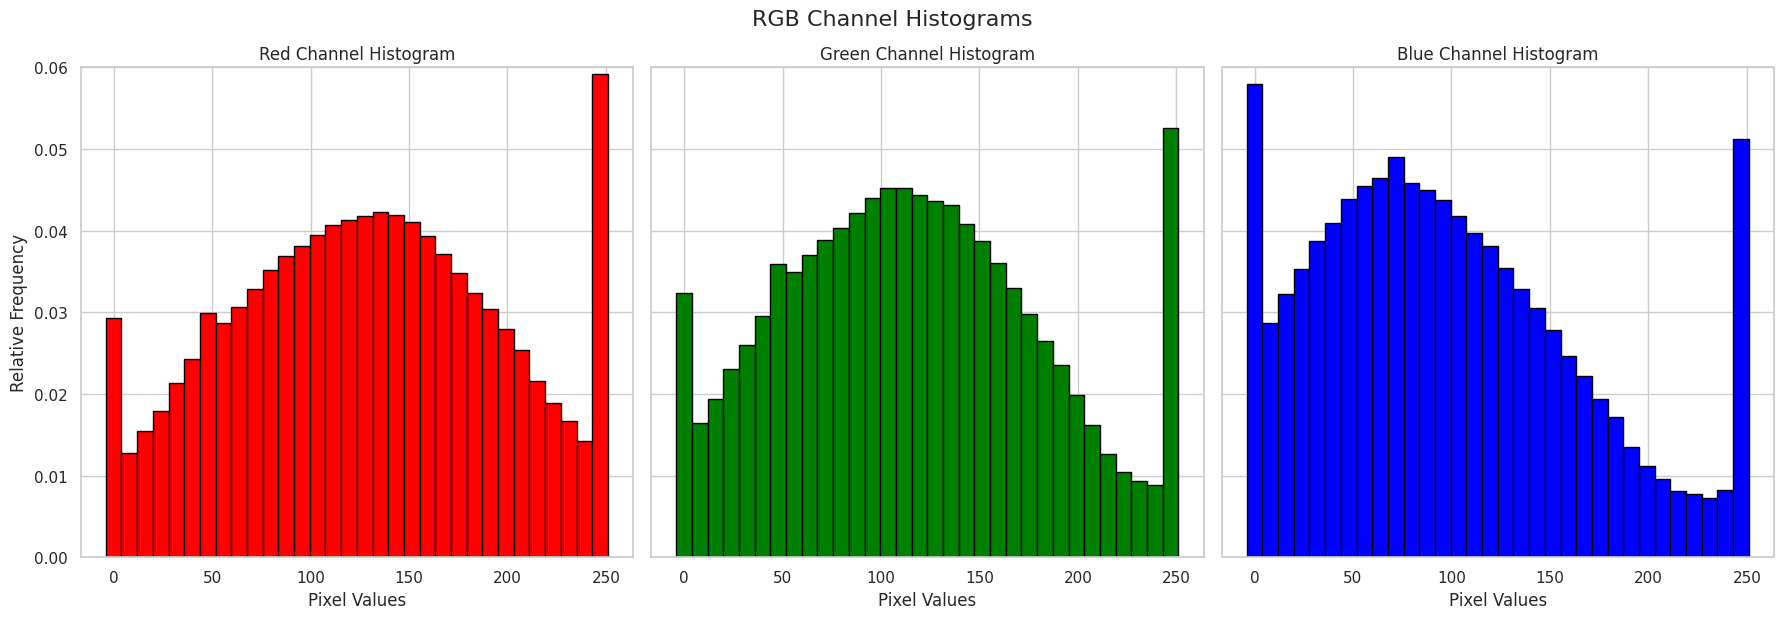

In [55]:
# cats rgb-histograms
(r_hist, r_bins), (g_hist, g_bins), (b_hist, b_bins) = calculate_hist(cats_data)
plot_hist(r_hist, r_bins, g_hist, g_bins, b_hist, b_bins)

#dogs rgb-histograms
(r_hist, r_bins), (g_hist, g_bins), (b_hist, b_bins) = calculate_hist(dogs_data)
plot_hist(r_hist, r_bins, g_hist, g_bins, b_hist, b_bins)

#snakes rgb-histograms
(r_hist, r_bins), (g_hist, g_bins), (b_hist, b_bins) = calculate_hist(snakes_data)
plot_hist(r_hist, r_bins, g_hist, g_bins, b_hist, b_bins)

## 5. HSV-Histograms

In [56]:
def calculate_hsl_pdf(data, bins=64):

    h_hist = np.zeros(bins, dtype=int)
    s_hist = np.zeros(bins, dtype=int)
    l_hist = np.zeros(bins, dtype=int)

    for img in data:
        img_rgb = img / 255.0 
        img_hsv = rgb2hsv(img_rgb) 

        h_channel = (img_hsv[:, :, 0] * 360).flatten()
        s_channel = img_hsv[:, :, 1].flatten()
        l_channel = img_hsv[:, :, 2].flatten()

        h_hist += np.histogram(h_channel, bins=bins, range=(0, 360))[0]
        s_hist += np.histogram(s_channel, bins=bins, range=(0, 1))[0]
        l_hist += np.histogram(l_channel, bins=bins, range=(0, 1))[0]

    h_pdf = h_hist / h_hist.sum()
    s_pdf = s_hist / s_hist.sum()
    l_pdf = l_hist / l_hist.sum()

    h_bins = np.linspace(0, 360, bins + 1)
    s_bins = np.linspace(0, 1, bins + 1)
    l_bins = np.linspace(0, 1, bins + 1)

    return h_pdf, h_bins, s_pdf, s_bins, l_pdf, l_bins


In [ ]:
def plot_hsl_hist(h_pdf, h_bins, s_pdf, s_bins, l_pdf, l_bins):

    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=False, sharey=True)

    axes[0].bar(h_bins[:-1], h_pdf, width=np.diff(h_bins), color='orange', edgecolor='black')
    axes[0].set_title("Hue Channel Histogram")
    axes[0].set_xlabel("Hue (Degrees)")
    axes[0].set_ylabel("Probability Density")
    axes[0].set_ylim([0, 0.25])

    axes[1].bar(s_bins[:-1], s_pdf, width=np.diff(s_bins), color='purple', edgecolor='black')
    axes[1].set_title("Saturation Channel Histogram")
    axes[1].set_xlabel("Saturation (0-1)")

    axes[2].bar(l_bins[:-1], l_pdf, width=np.diff(l_bins), color='gray', edgecolor='black')
    axes[2].set_title("Lightness (Value) Channel Histogram")
    axes[2].set_xlabel("Lightness (0-1)")

    plt.tight_layout()
    plt.suptitle("HSL Channel Histograms", fontsize=16, y=1.03)
    plt.show()


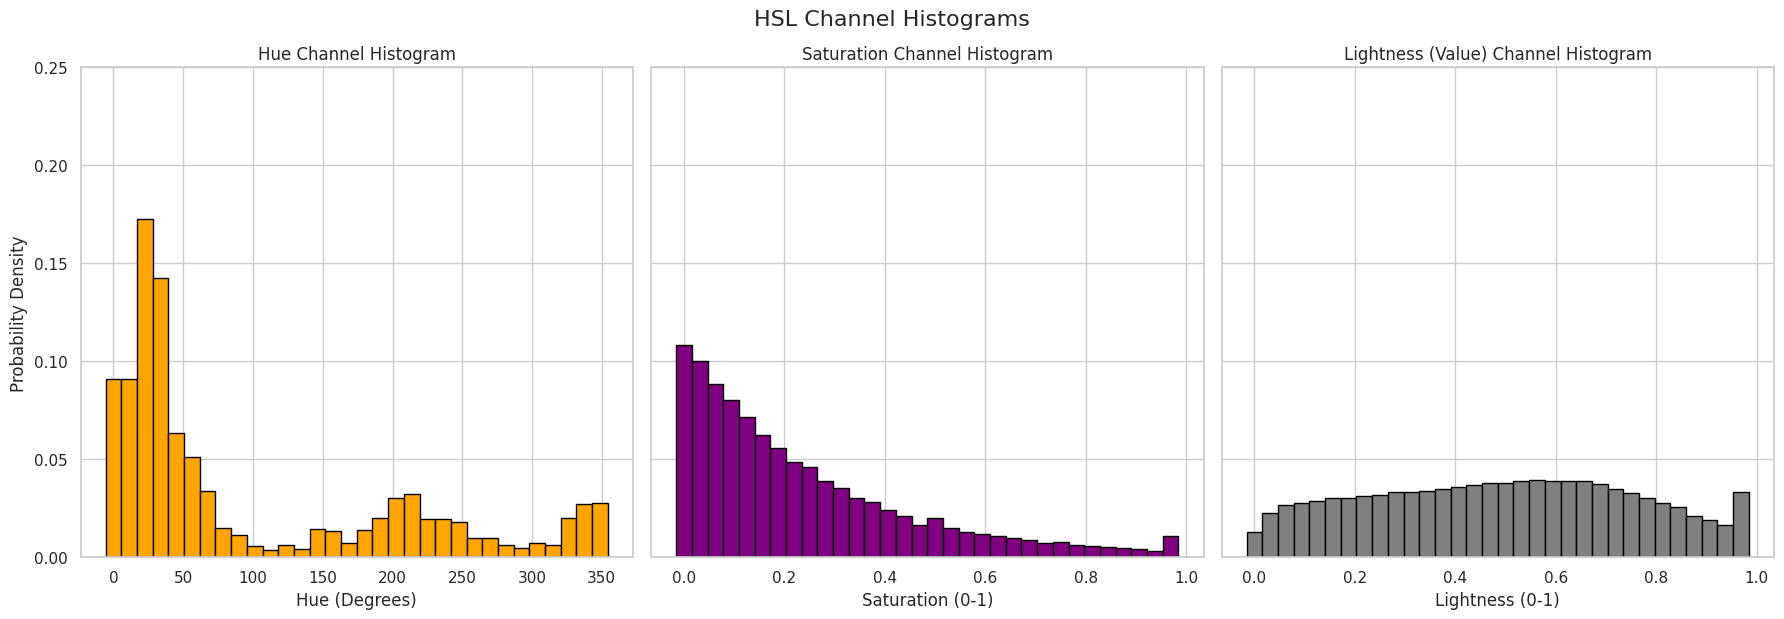

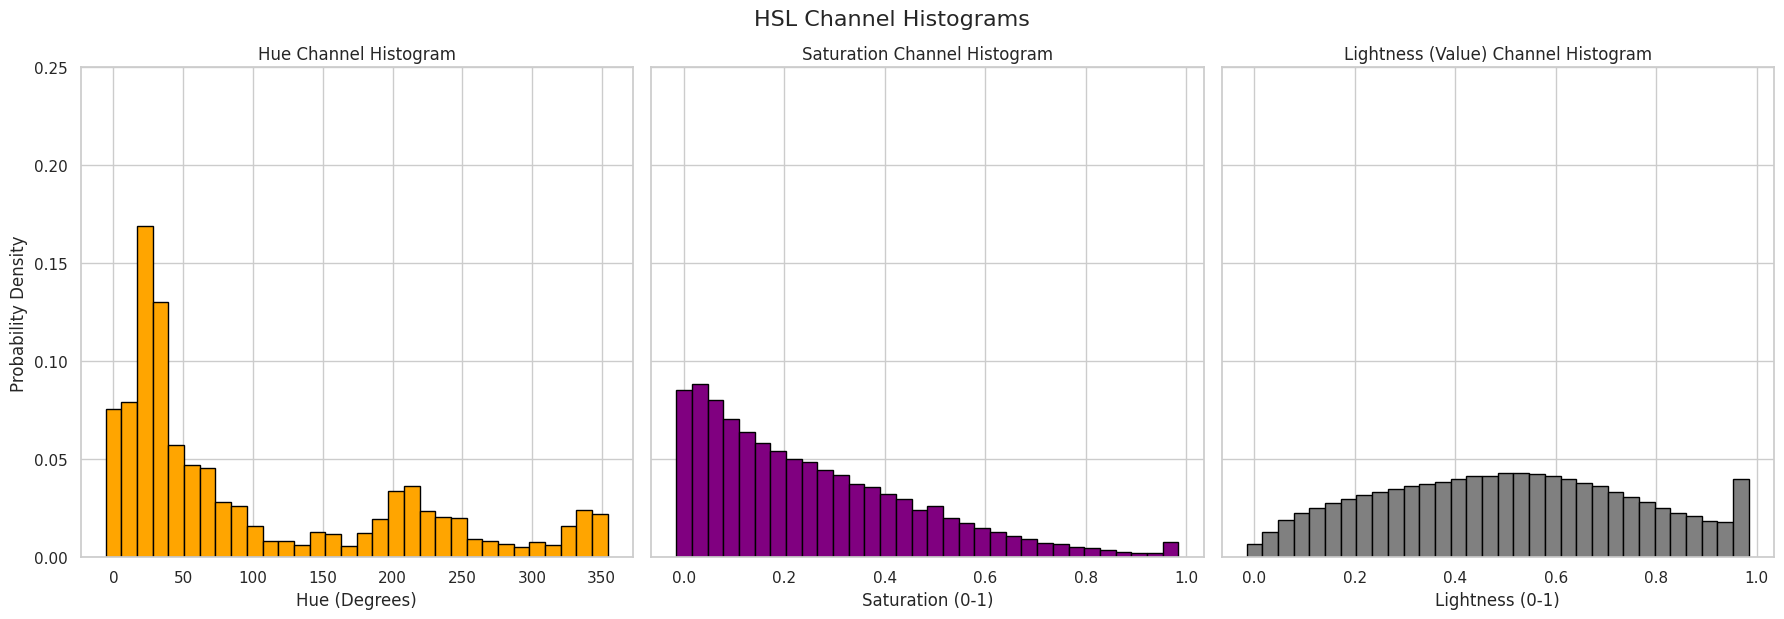

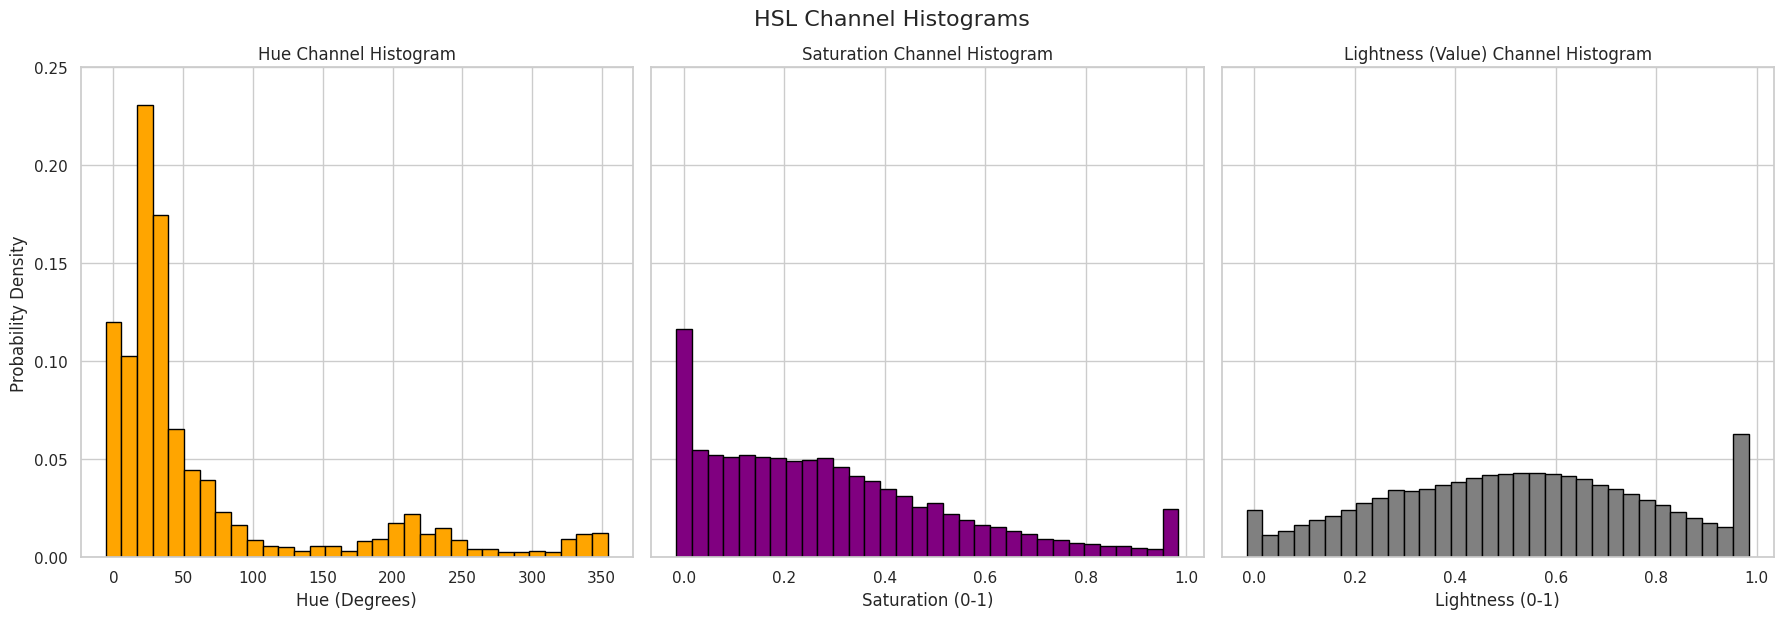

In [58]:
# cats hsv-histograms
h_pdf, h_bins, s_pdf, s_bins, l_pdf, l_bins = calculate_hsl_pdf(cats_data, bins=32)
plot_hsl_hist(h_pdf, h_bins, s_pdf, s_bins, l_pdf, l_bins)

# dogs hsv-histograms
h_pdf, h_bins, s_pdf, s_bins, l_pdf, l_bins = calculate_hsl_pdf(dogs_data, bins=32)
plot_hsl_hist(h_pdf, h_bins, s_pdf, s_bins, l_pdf, l_bins)

# snakes hsv-histograms
h_pdf, h_bins, s_pdf, s_bins, l_pdf, l_bins = calculate_hsl_pdf(snakes_data, bins=32)
plot_hsl_hist(h_pdf, h_bins, s_pdf, s_bins, l_pdf, l_bins)